# Apple Quality Prediction

<img src="https://storage.googleapis.com/kaggle-datasets-images/4291772/7384155/168acfd1f6ff796e7d9cd23602494f15/dataset-cover.jpeg?t=2024-01-11-14-32-08">



## Description:
This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

## Key Features:
* **A_id:** Unique identifier for each fruit
* **Size:** Size of the fruit
* **Weight:** Weight of the fruit
* **Sweetness:** Degree of sweetness of the fruit
* **Crunchiness:** Texture indicating the crunchiness of the fruit
* **Juiciness:** Level of juiciness of the fruit
* **Ripeness:** Stage of ripeness of the fruit
* **Acidity:** Acidity level of the fruit
* **Quality:** Overall quality of the fruit

# 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

<a id="2"></a>
# 2. Read Dataset

In [2]:
apple_df = pd.read_csv('apple_quality.csv')
apple_df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


<a id="read"></a>
# 3. Dataset Overview

In [3]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


**Inference**:
* The dataset contains **4001** entries and **9** columns.
* Columns 'A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', and 'Quality' have 4000 non-null entries, indicating one missing value in these columns.
* Column 'Acidity' has 4001 non-null entries.
* The '**Acidity**' column being of **object** type might need to be converted to a **numerical** data type as it represents a quantitative measure, and similar treatment might be needed for the 'Quality' column depending on its nature.
* The '**A_id**' column appears to be an insignificant variable that can be dropped from the analysis.


In [4]:
# Removing insignificant variables
apple_df.drop( 'A_id', axis = 1, inplace=True)

In [5]:
# Convert 'Acidity' column from object type to float64
apple_df['Acidity'] = pd.to_numeric(apple_df['Acidity'], errors='coerce')

In [6]:
apple_df.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

## 3.1.Summary statistics

In [7]:
apple_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


**Inference**:
* The dataset seems to have undergone preprocessing, possibly normalization or standardization, given the negative minimum values and mean around 0.
* Further analysis could involve exploring correlations between features and the 'Quality' of fruits to understand relationships and potentially build prediction models.

## 3.2 : Missing Value Treatment

In [8]:
# checking for null values 
null = pd.DataFrame({'Null Values' : apple_df.isna().sum(), 'Percentage Null Values' : (apple_df.isna().sum()) /len(apple_df) * (100)})
null

,Null Values,Percentage Null Values
Size,1,0.024994
Weight,1,0.024994
Sweetness,1,0.024994
Crunchiness,1,0.024994
Juiciness,1,0.024994
Ripeness,1,0.024994
Acidity,1,0.024994
Quality,1,0.024994


In [9]:
apple_df.dropna(inplace=True)

# 4: EDA

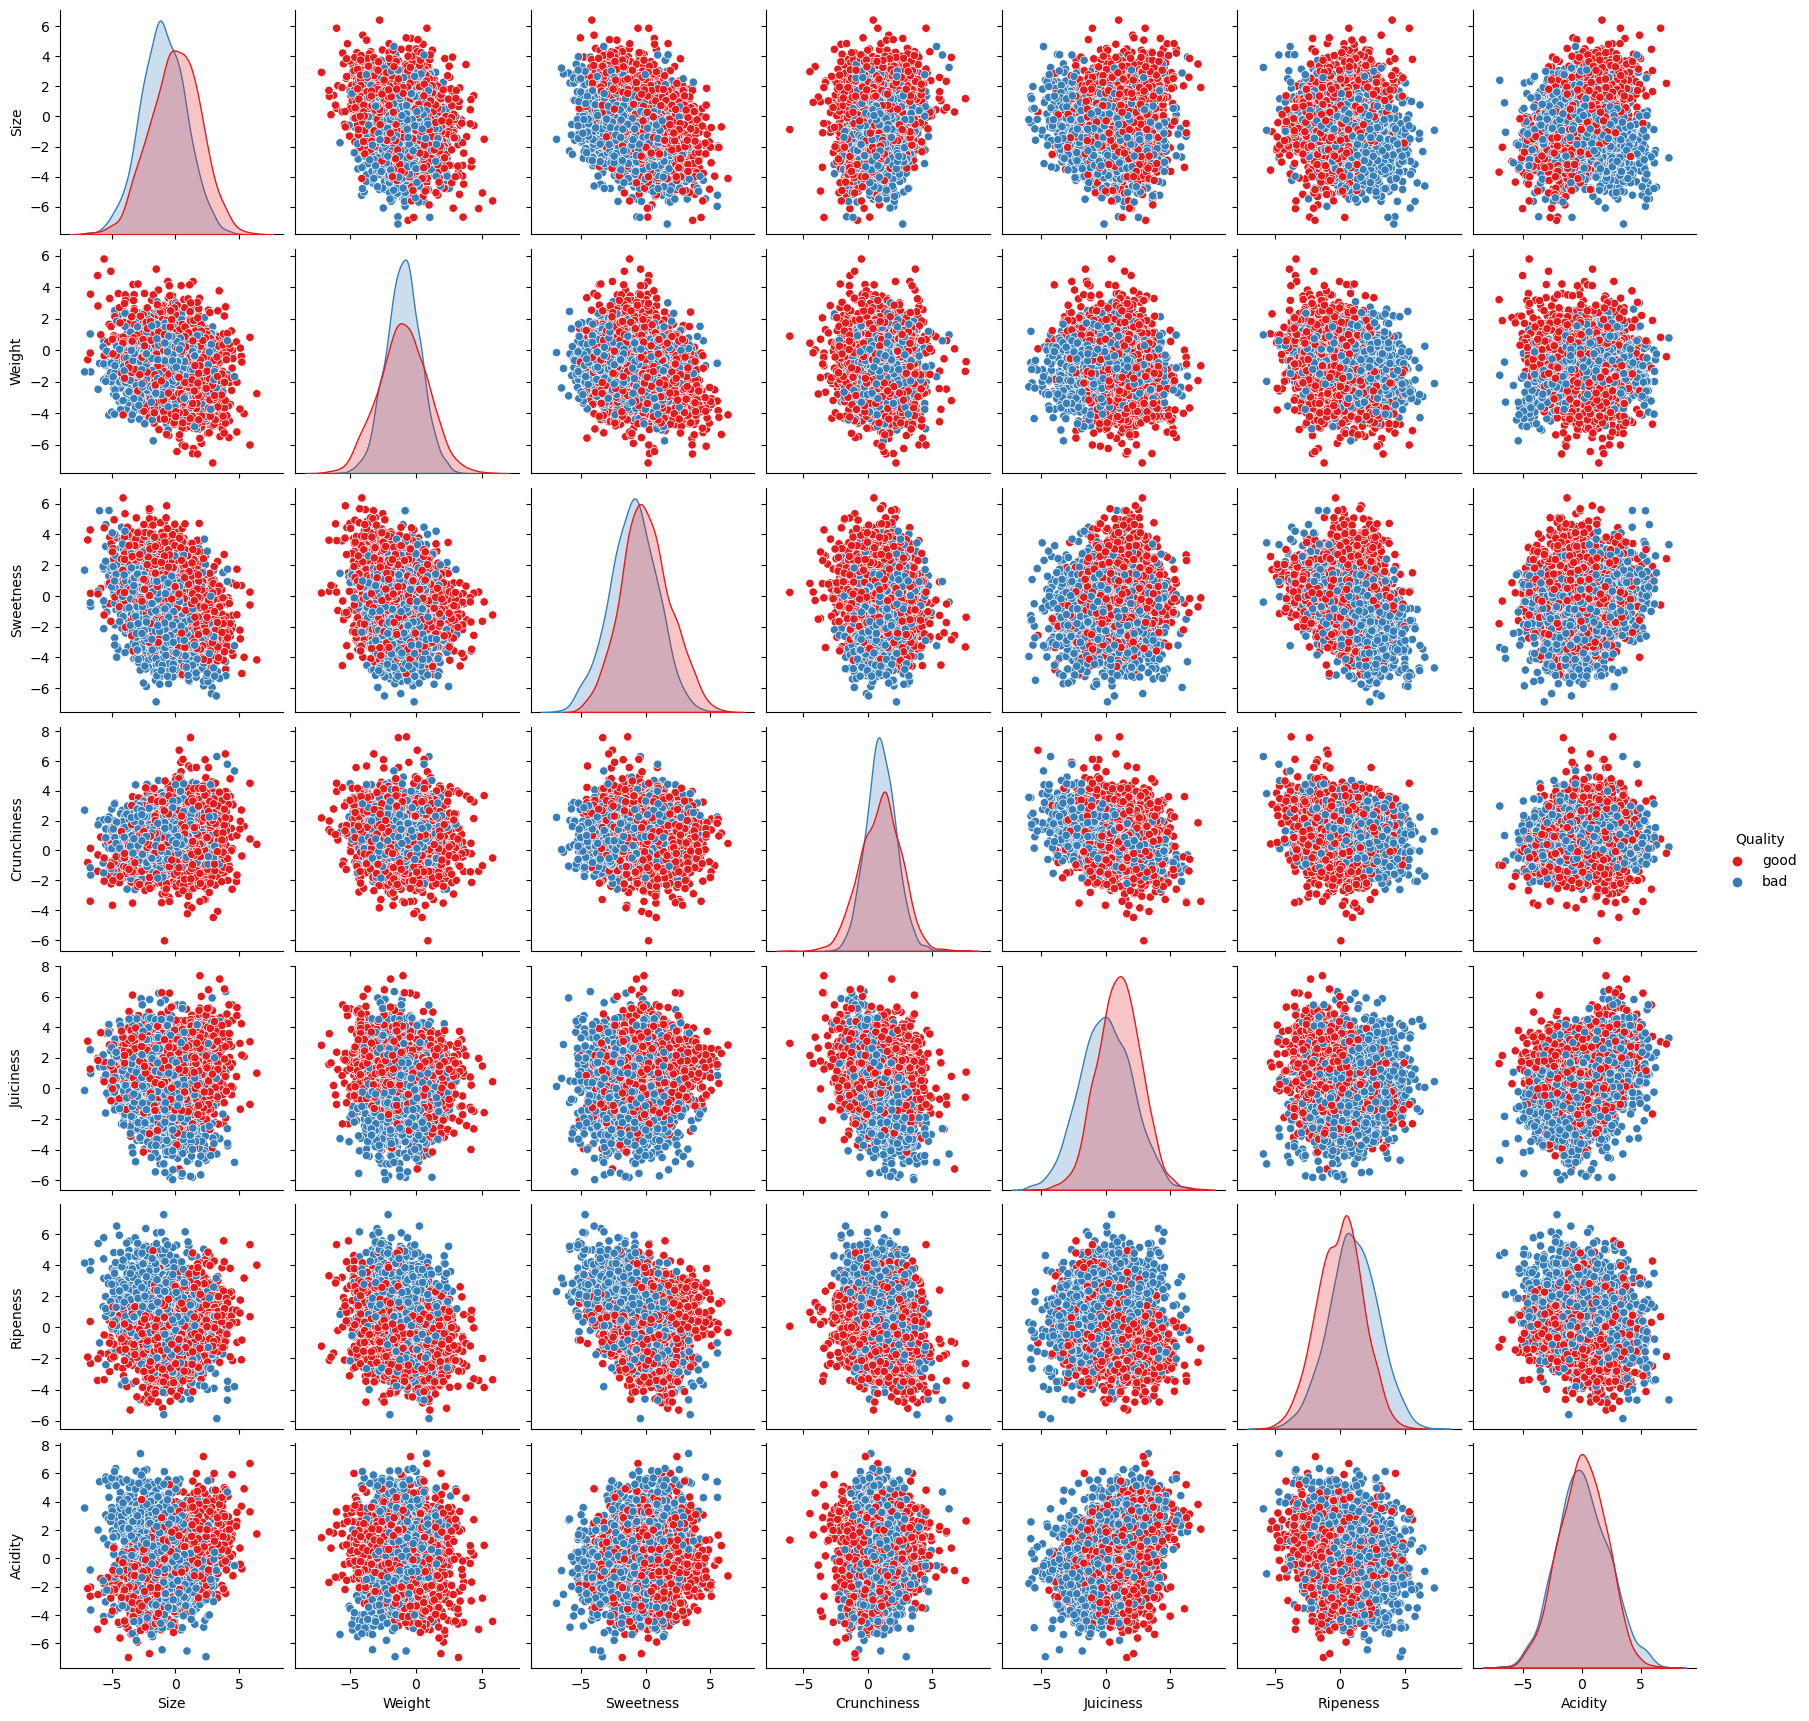

In [10]:
sns.pairplot(apple_df,hue='Quality',palette='Set1')

# 5. Target Feature Modification
**bad --> 0, Good --> 1**

In [11]:
apple_df['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

In [12]:
apple_df['Quality'] = apple_df['Quality'].replace({'good': 1, 'bad': 0}).astype(int)

In [13]:
apple_df['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

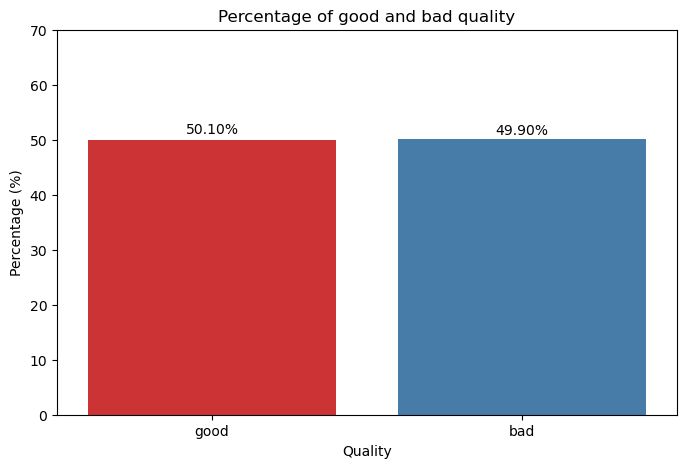

In [15]:
# Calculating the percentage of each class
percentage = apple_df['Quality'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette='Set1')
plt.title('Percentage of good and bad quality')
plt.xlabel('Quality')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['good', 'bad'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

**inference**:
* The bar plot shows that **50.10%** of apples were **bad**, while **49.90%** were **good**.
* The distribution of data suggests a **balanced dataset**.

# 6: Logistic regression
## 6.1: Splitting the data into Train and Test

In [16]:
X = apple_df.iloc[:,:-1]

In [17]:
y = apple_df.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3200, 7)
y_train (3200,)
X_test (800, 7)
y_test (800,)


## 6.2: Feature Selection

In [19]:
from sklearn.feature_selection import RFECV
model = LogisticRegression()

selector = RFECV(
    estimator=model,
    min_features_to_select=3,
    scoring='f1',
    cv=5,
)

In [20]:
selector.fit(X_train,y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=3,
      scoring='f1')

In [21]:
X_train.columns[selector.support_]

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity'],
      dtype='object')

In [22]:
len(X_train.columns[selector.support_])

7

In [23]:
X_train = X_train.loc[:,selector.support_]
X_train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1420,-1.304400,-5.032275,0.291006,3.394300,0.030702,-3.116206,-0.185962
1638,-1.423864,0.329041,-1.132315,1.596105,1.275958,0.269907,-0.235372
616,1.701191,-0.242767,-1.610199,2.587950,-1.843153,-0.286345,1.402366
184,-4.968508,-0.814306,-0.481643,1.814280,1.347889,3.772847,1.951706
2075,-2.295814,-2.917693,-1.058796,0.617372,-1.959403,2.531234,-3.004119


### 6.2.1: Model training

In [24]:
from sklearn.model_selection import GridSearchCV

# Define grid
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear','sag','saga']}

model = LogisticRegression(fit_intercept = True, max_iter = 1000)

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = 'f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [25]:
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018540,0.000729,0.004794,0.001585,None,newton-cg,"{'class_weight': None, 'solver': 'newton-cg'}",0.764253,0.767584,0.7375,0.747287,0.769912,0.757307,0.012692,1
1,0.008779,0.000753,0.003915,0.000176,None,lbfgs,"{'class_weight': None, 'solver': 'lbfgs'}",0.764253,0.767584,0.7375,0.747287,0.769912,0.757307,0.012692,1
3,0.015920,0.001332,0.005206,0.000869,None,sag,"{'class_weight': None, 'solver': 'sag'}",0.764253,0.767584,0.7375,0.747287,0.769912,0.757307,0.012692,1
4,0.011327,0.000416,0.004496,0.000623,None,saga,"{'class_weight': None, 'solver': 'saga'}",0.764253,0.767584,0.7375,0.747287,0.769912,0.757307,0.012692,1
2,0.005797,0.000750,0.004402,0.000490,None,liblinear,"{'class_weight': None, 'solver': 'liblinear'}",0.762346,0.767584,0.7375,0.748447,0.769912,0.757158,0.012334,5


In [26]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=1000, solver='newton-cg')

In [27]:
best_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

<Axes: xlabel='Feature'>

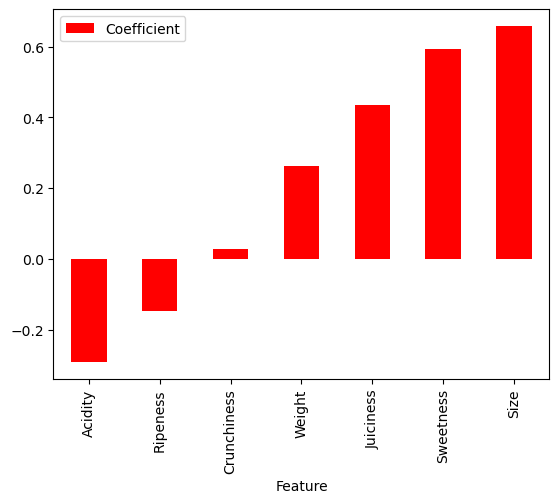

In [28]:
# Feature Importance
feature_importance_df = pd.DataFrame({"Feature": list(X_train.columns), "Coefficient": best_model.coef_[0]})
feature_importance_df.sort_values("Coefficient").plot.bar(x = 'Feature', y='Coefficient',color='red')

In [29]:
feature_importance_df.sort_values("Coefficient", ascending=False)

,Feature,Coefficient
0,Size,0.657694
2,Sweetness,0.594048
4,Juiciness,0.434200
1,Weight,0.262524
3,Crunchiness,0.028123
5,Ripeness,-0.147369
6,Acidity,-0.291278


**Inference:** 

* **Size:** Larger apples are more preferred, suggesting that size is positively correlated with the desirability of apples.

* **Sweetness:** Sweeter apples are preferred, indicating that sweetness significantly influences apple preference among consumers.

* **Juiciness:** More juicy apples are preferred, implying that juiciness is a key factor in determining which apples consumers prefer.

* **Weight:** Heavier apples are preferred, suggesting that weight contributes to the perceived quality and desirability of apples.

* **Ripeness:** Overly ripe apples may be less preferred, as indicated by the negative coefficient. This suggests that apples that are too ripe might be less desirable to consumers, potentially due to concerns about texture or freshness.

* **Acidity:** Apples with higher acidity levels may be slightly less preferred. While acidity can enhance flavor, excessive acidity might lead to a lower preference among consumers.

In summary, larger, sweeter, juicier, and heavier apples tend to be preferred by consumers, while overly ripe apples and those with high acidity may be less preferred.

## 7: Model Evaluation

In [30]:
X_test = X_test.loc[:,selector.support_]
X_test.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
1203,-1.328021,-3.509870,1.180195,1.844719,-2.361462,-0.453976,-3.130528
2827,0.553790,-0.114322,-1.075704,-0.096240,1.380802,-1.297286,-0.037817
2325,-1.447189,-1.675930,-0.464820,2.638307,-2.620991,3.498612,-0.495154
3916,-0.369054,2.500206,-1.124518,-0.332943,-0.710734,-0.782862,0.473000
3821,3.024898,-1.870915,-2.666318,2.286341,-3.604327,0.735995,-0.059953


In [31]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [33]:

import matplotlib.pyplot as plt
def modeel_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap resembling an apple (red theme)
    apple_red = LinearSegmentedColormap.from_list('apple_red', [(0, '#FF0000'), (1, '#FFFFFF')])
    apple_red_r = apple_red.reversed() 
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=apple_red_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#FF0000')
    plt.tight_layout()
    plt.show()



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1592
           1       0.75      0.77      0.76      1608

    accuracy                           0.75      3200
   macro avg       0.75      0.75      0.75      3200
weighted avg       0.75      0.75      0.75      3200


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       404
           1       0.72      0.76      0.74       396

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



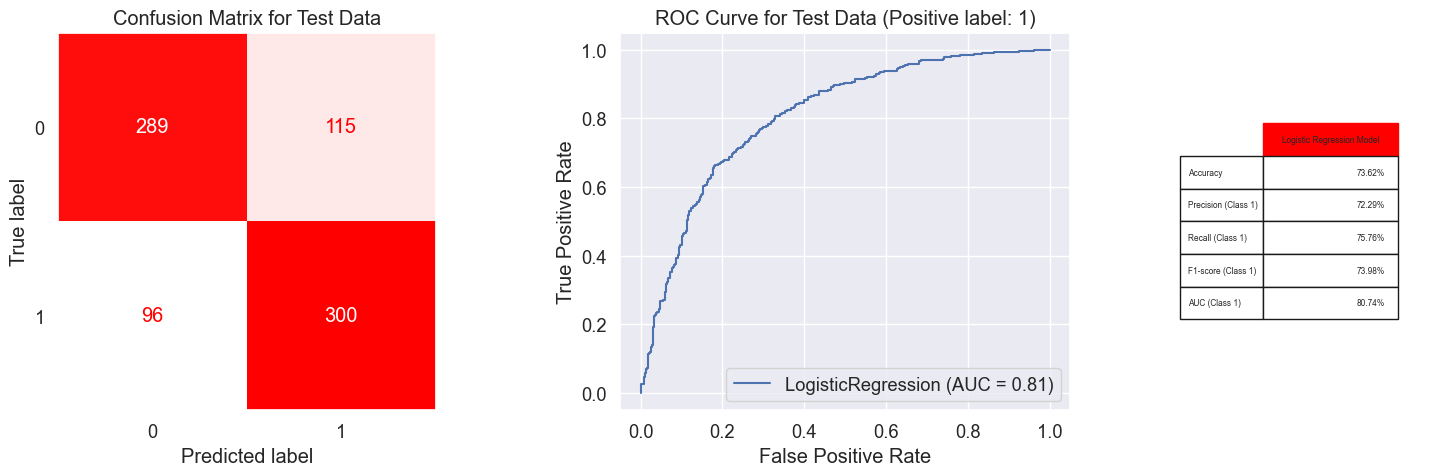

In [34]:
modeel_evaluation(best_model, X_train, X_test, y_train, y_test, 'Logistic Regression Model')

**Inference:**<br>
Our Logistic Regression model's performance on the test data is as follows:

The **Accuracy** is 73.62%, which means the model is correctly predicting whether a apple will be good or bad.

The **Precision** for class 1 (good apple) is 72.29%, which means that 72% of the apples that the model predicted as good were actually good.

The **Recall** for class 1 is 75.76%, which means that the model correctly identified 78% of the actual good apples.

The **F1-score** for class 1 is 73.98%, which is the harmonic mean of Precision and Recall.

The **AUC** (Area Under the ROC Curve) for class 1 is 80.74%, which means that the model has a good discriminative power between the two classes.

The confusion matrix shows that there are still some False Positives and False Negatives, but the model is doing a relatively good job of minimizing them.

Additionally, the model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Overall, this model is performing well on the test data and seems to be a good model for predicting **good apples**, although there is room for improvement.